# 선형회귀(Linear Regression)

본 수업에서는 머신러닝의 가장 간단한 형태인 선형회귀 문제를 해결한다.

경사 하강법을 통해 비용함수를 최적화 시키며 직접 구현하는 작업을 텐서플로우의 Gradient Tape를 통해 진행해 본다.



In [88]:
# 필요 라이브러리 임포트
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [89]:
import tensorflow as tf


$y = 2w^2 + 5$

In [90]:
w = tf.Variable(2.)

def f(w):
    y = 2*(w**2) + 5
    return y


In [91]:
with tf.GradientTape() as tape:
    z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [92]:
import os
from six.moves import urllib
for fn_dst in ['ex1data1.txt', 'ex1data2.txt']:
    fn_src = 'https://raw.githubusercontent.com/suakii/1stgradeCS/main/ex1/data/%s' % fn_dst

    if os.path.isfile(fn_dst):
        print('File %s is already downloaded' % fn_dst)
    else:
        print('Downloaded %s' % fn_dst)
        urllib.request.urlretrieve(fn_src, fn_dst)

File ex1data1.txt is already downloaded
File ex1data2.txt is already downloaded


In [93]:
# 콤마로 분리된 데이터 읽기
data = np.loadtxt('ex1data1.txt', delimiter=',')

#실습
X, y = data[:, 0], data[:, 1]

m = y.size  # 훈련용 데이터의 크기
print(X.shape)
print(y.shape)
print(m)


(97,)
(97,)
97


Text(0.5, 0, 'Population of City in 10,000s')

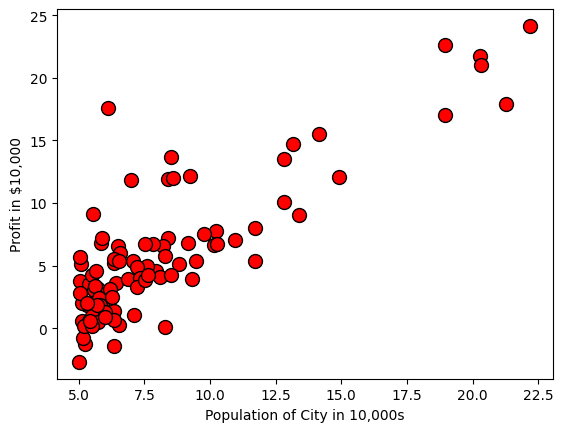

In [94]:
# 그래프 그리기
plt.plot(X, y, 'ro', ms=10, mec='k')
plt.scatter(X, y)
# 실습

plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')

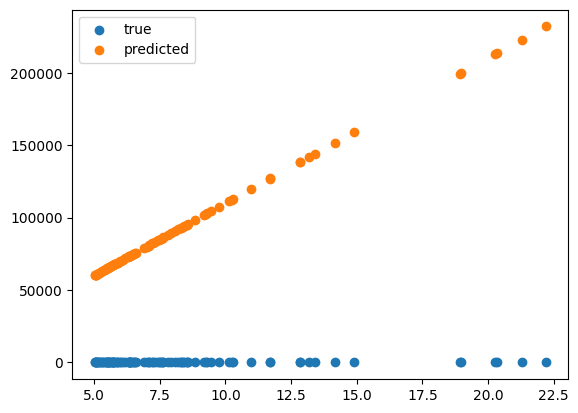

Epoch 0: Loss: 9870931968.0
Epoch 1: Loss: 4108199936.0
Epoch 2: Loss: 1714610560.0
Epoch 3: Loss: 720383040.0
Epoch 4: Loss: 307375424.0
Epoch 5: Loss: 135775600.0
Epoch 6: Loss: 64443940.0
Epoch 7: Loss: 34758664.0
Epoch 8: Loss: 22371470.0
Epoch 9: Loss: 17169392.0
Epoch 10: Loss: 14952035.0
Epoch 11: Loss: 13974773.0
Epoch 12: Loss: 13512988.0
Epoch 13: Loss: 13265705.0
Epoch 14: Loss: 13107913.0
Epoch 15: Loss: 12987692.0
Epoch 16: Loss: 12883464.0
Epoch 17: Loss: 12786272.0
Epoch 18: Loss: 12692388.0
Epoch 19: Loss: 12600265.0
Epoch 20: Loss: 12509257.0
Epoch 21: Loss: 12419089.0
Epoch 22: Loss: 12329650.0
Epoch 23: Loss: 12240887.0
Epoch 24: Loss: 12152773.0
Epoch 25: Loss: 12065302.0
Epoch 26: Loss: 11978462.0
Epoch 27: Loss: 11892248.0
Epoch 28: Loss: 11806654.0
Epoch 29: Loss: 11721675.0
Epoch 30: Loss: 11637310.0
Epoch 31: Loss: 11553552.0
Epoch 32: Loss: 11470398.0
Epoch 33: Loss: 11387842.0
Epoch 34: Loss: 11305877.0
Epoch 35: Loss: 11224505.0
Epoch 36: Loss: 11143718.0
Ep

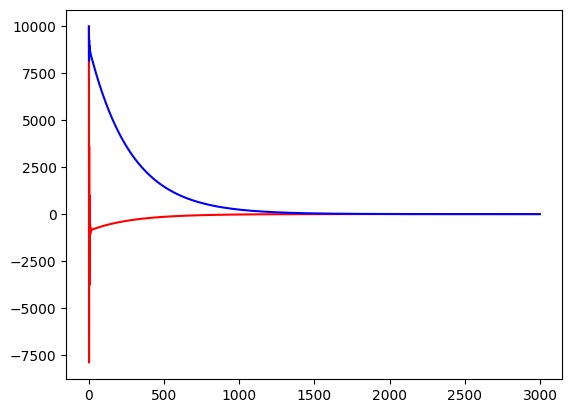

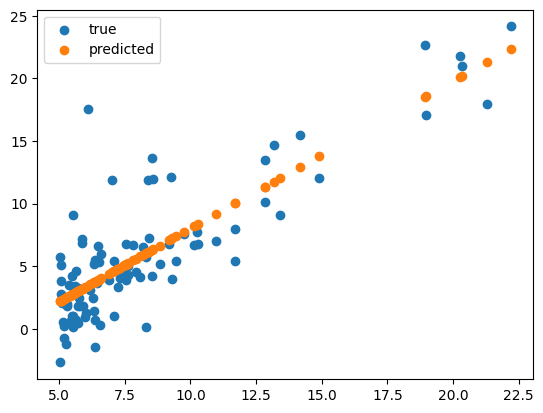

In [102]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class Model:
    def __init__(self):
        self.W = tf.Variable(10000.0)
        self.b = tf.Variable(10000.0)

    def __call__(self, x):
        return self.W * x + self.b

X = X
y = y
model = Model()

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

plt.figure()
plt.scatter(X, y, label="true")
plt.scatter(X, model(X), label="predicted")
plt.legend()
plt.show()

def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

def train(model, X, y, lr=10.01):
    with tf.GradientTape() as t:
        current_loss = loss(y, model(X))

    gradients = t.gradient(current_loss, [model.W, model.b])
    optimizer.apply_gradients(zip(gradients, [model.W, model.b]))



Ws, bs = [], []
epochs = 3000
for epoch in range(epochs):
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(y, model(X))
    train(model, X, y, lr=0.1)
    print(f"Epoch {epoch}: Loss: {current_loss.numpy()}")

plt.figure()
plt.plot(range(epochs), Ws, 'r', range(epochs), bs, 'b')
plt.show()

plt.figure()
plt.scatter(X, y, label="true")
plt.scatter(X, model(X), label="predicted")
plt.legend()
plt.show()